# **SUPERVISED LEARNING 2**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download parulpandey/palmer-archipelago-antarctica-penguin-data
! unzip palmer-archipelago-antarctica-penguin-data.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/11.3k [00:00<?, ?B/s]
100% 11.3k/11.3k [00:00<00:00, 7.46MB/s]
Archive:  palmer-archipelago-antarctica-penguin-data.zip
  inflating: penguins_lter.csv       
replace penguins_size.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace penguins_size.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: penguins_size.csv       


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Data processing libraries
# ==============================================================================
import pandas as pd
import numpy as np

# Preprocessing, modeling and validation libraries 
# ==============================================================================
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix


# Graphics display libraries
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.pyplot as plp
import seaborn as sns

##1. EXPLORATORY ANALYSIS

Loading of the **penguin species** dataset available in Kaggle.

In [4]:
# Import dataset and remove first nulls
import pandas as pd
penguins = pd.read_csv('penguins_size.csv')
penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [5]:
# I'm keeping the original dataset just in case.
penguins_ori = penguins

As you can see, there are two complete rows of null values, so we proceed to eliminate them.



In [6]:
penguins = pd.read_csv('penguins_size.csv').dropna()
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


Apart from the Target (Species), the variables 'island' and 'sex' are also of type Object. We will remove them previously in the separation of Training and Test data.

In [7]:
# We obtain the meta information from the dataset.
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


We note that both specias, island and sex are variables of type Object.

In [8]:
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


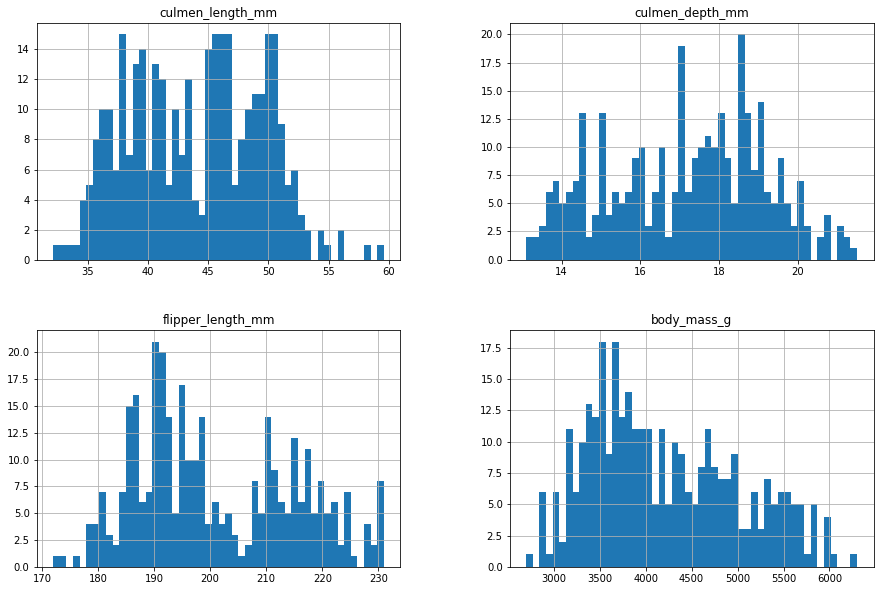

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
penguins.hist(bins = 50, figsize=(15,10))
plt.show() 

No out-of-range values are observed.

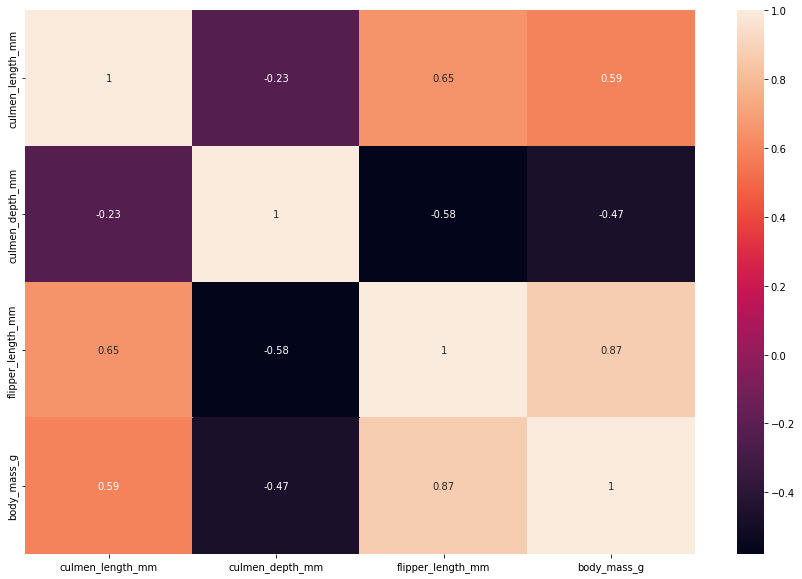

In [10]:
plp.figure(figsize=(15, 10))
correlacion = penguins.corr()
sns.heatmap(correlacion, annot=True);


###1.1 SEPARATING TRAINING FROM TESTING USING THE CLASSIFICATION MODEL KNN (KNEIGHBORSCLASSIFIER)

Data preparation, "model" training and predictions. We will use **k=3**, so that each prediction will be based on the three instances closest to each test instance.

In [11]:
# Separate predictor attributes and class attribute.
# For predictor attributes we keep only "culmen_length_mm" and "culmen_depth_mm".
#X = penguins[["culmen_length_mm","culmen_depth_mm"]]
X = penguins[["culmen_length_mm","flipper_length_mm"]]
y = penguins["species"]

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=4)

# Initialize a kNN classification model, with hyperparameter 'k=3'.
knn = KNeighborsClassifier(n_neighbors=3)

# Train model: it may seem confusing to do this, since we are talking about an instance-based algorithm.
# However, we need to do this because the 'model' will be the training data itself..
knn.fit(X_train, y_train)

# Making predictions on test data
predictions = knn.predict(X_test)

In [12]:
accuracy_score(y_test, predictions) 

0.9504950495049505

### 1.3. SOFTMAX REGRESSION


In [13]:
from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs")
softmax_reg.fit(X, y)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(multi_class='multinomial')

In [14]:
penguins.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [15]:
softmax_reg.predict_proba([[43, 17.2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[7.32346976e-13, 1.00000000e+00, 2.88375778e-52]])

For a beak length of 43mm and a beak depth of 17.2mm, we have the following probabilities for the following Target species:


*   Adelie: 0%
*   Chinstrap: 100%
*   Gentoo: 0%

Therefore, for these values we would have a 100% probability that it was a Penguin of the species **Chinstrap**.





In [16]:
score = softmax_reg.score(X_train,y_train)
score

0.9570815450643777

In [17]:
score = softmax_reg.score(X_test,y_test)
score

0.9603960396039604

The accuracy of the Softmax model in Training is 95.2% and in Test 97.6%.
Some underfitting is noted.

In [18]:
y_pred_sf = softmax_reg.predict(X)
print('Goodness of fit with SoftMax\n')
from sklearn.metrics import classification_report
print(classification_report(y, y_pred_sf))

Goodness of fit with SoftMax

              precision    recall  f1-score   support

      Adelie       0.96      0.97      0.96       146
   Chinstrap       0.94      0.88      0.91        68
      Gentoo       0.97      0.99      0.98       120

    accuracy                           0.96       334
   macro avg       0.95      0.95      0.95       334
weighted avg       0.96      0.96      0.96       334



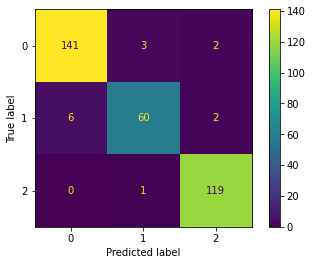

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y, y_pred_sf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Interpretation of the Confusion matrix:

* For species 0 (Adelie), we would have from a total of 148, 141 positives and 3 false positives that would certainly belong to species 2 (Chinstrap).
* For species 1 (Chinstrap), we would have a total of 68, 60 positives and 6 false positives that would belong to species 0 (Adelie) and 2 false positives that would belong to species 0 (Gentoo).
* For species 2 (Gentoo), we would have a total of 120, 119 positives and 1 false positive belonging to species 1 (Chinstrap).





##1.4. Training and evaluation of a SVM classifier on test data






In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC # SVC: Support Vector Classification
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=.2, random_state=42)

svm = Pipeline([
                           ("scaler", StandardScaler()),
                           ("linear_svc", LinearSVC(C=1, loss="hinge", fit_intercept=False)),
])

svm.fit(X_train, y_train)

y_pred_test = svm.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_test)
svm_acc

1.0

After several tests, I have settled on the following hyperparameters for the SVM classifier:
Scaler: 
* Standardscaler
* C : 1
* Loss: Hinge

Which has given us an accuracy of 100%. 

Goodness or Accuracy in the classification with the SVM model: We obtained a goodness of 100% for the classification of the Gentoo type penguins, 100% for the Adelie type and 100% for the Chinstrap type.

Therefore, I consider the SVM classification model much more adequate than the Softmax one, based on the results obtained in both classifications.
 


In [21]:
print('Goodness of classification with SVM\n')
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

Goodness of classification with SVM

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



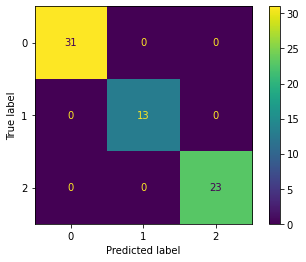

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Interpretation of the Confusion matrix for the test data:

* For species 0 (Adelie), we would have a total of 31 positives and no false positives.
* For species 1 (Chinstrap), we would have a total of 13 positives and no false positives.
* For species 2 (Gentoo), we would have a total of 23 positives and no false positives.




##2. Train 4 decision tree models: one of them without any constraints (without specifying hyperparameters), and the other three under different hyperparameter settings that apply regularization on the tree growth and shape during training.

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [24]:
# Training the two trees

from sklearn.tree import DecisionTreeClassifier

tree4 = DecisionTreeClassifier(random_state=42)
tree4.fit(X_train, y_train)

tree5 = DecisionTreeClassifier(min_samples_split=6, random_state=42)
tree5.fit(X_train, y_train)

tree6 = DecisionTreeClassifier(max_depth = 4, random_state=42)
tree6.fit(X_train, y_train)

tree7 = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
tree7.fit(X_train, y_train)

tree8 = DecisionTreeClassifier(max_features='auto', random_state=42)
tree8.fit(X_train, y_train)

DecisionTreeClassifier(max_features='auto', random_state=42)

##2.1. Evaluate the accuracy of the training and the first tree test.

In [25]:
from sklearn.metrics import accuracy_score

y_pred1_tr = tree4.predict(X_train)
accuracy_score(y_pred1_tr, y_train)

1.0

In [26]:
y_pred1 = tree4.predict(X_test)
tree4_acc= accuracy_score(y_pred1, y_test)
tree4_acc

0.9761904761904762

Less than a 3% difference between the training and the test indicates a small overfit of the model.

##2.2. Second Tree: Max Samples Split

In [27]:
y_pred2_tr = tree5.predict(X_train)
accuracy_score(y_pred2_tr, y_train)

0.976

In [28]:
y_pred2 = tree5.predict(X_test)
tree5_acc=accuracy_score(y_pred2, y_test)
tree5_acc

0.9761904761904762

Both Train and Test have a good predictive value (96%) and more importantly, the same result in both. The almost perfect model (perfect would be 100% in both).

##2.3. Third Tree: Max Depth = 4 





In [29]:
y_pred3_tr = tree6.predict(X_train)
accuracy_score(y_pred3_tr, y_train)

0.972

In [30]:
y_pred3 = tree6.predict(X_test)
tree6_acc=accuracy_score(y_pred3, y_test)
tree6_acc

0.9761904761904762

In a data separation in which only the Object attributes are removed from the X attributes, we obtain more overfitting than when we define the X variable with only the attributes of peak length and wing length. The latter confidurtation gives us an almost perfect result without overfitting. 

##2.4. Fourth Tree: Min Samples leaf

In [31]:
y_pred4_tr = tree7.predict(X_train)
accuracy_score(y_pred4_tr, y_train)

0.968

In [32]:
y_pred4 = tree7.predict(X_test)
tree7_acc=accuracy_score(y_pred4, y_test)
tree7_acc

0.9880952380952381

##2.5. Fifth Tree: Max features

In [33]:
y_pred5_tr = tree8.predict(X_train)
accuracy_score(y_pred5_tr, y_train)

1.0

In [34]:
y_pred5 = tree8.predict(X_test)
tree8_acc=accuracy_score(y_pred5, y_test)
tree8_acc

0.9642857142857143

Using any of the 3 features (auto, sqrt, log2) does not make any difference in the result.

**CONCLUSIONS**.

1. Unrestricted model:
* Train Accuracy 🡪 100%.
* Test accuracy 🡪 97.6%.
* Conclusions: a clear overfitting is observed since the training accuracy data are better than those of the test.

2. Model using the variable Max Samples Split = 6:
* Train Accuracy 🡪 97.6%.
Test Accuracy 🡪 97.6% * Test Accuracy 🡪 97.6%.
* Conclusions: NO overfitting is observed. The result is exactly in both cases. For me, this would be the best model I have tested with Decision Tree Clasiffier. 

Model using the variable Max Depth = 4:
* Train Accuracy 🡪 97.2%.
Accuracy Test 🡪 97.6% * Accuracy Test 🡪 97.6%.
* Conclusions: NO overfitting is observed. The result is exactly in both cases. This model is also almost perfect. I go for the previous one since in this one there is a negligible difference between the test and the Train (underfitting).

4.  Model using the variable Min Samples leaf = 3:
* Accuracy Train 🡪 96.8%.
* Accuracy Test 🡪 98.8%.
* Conclusions: Some underfitting is observed.

5.  Model using the variable Max Features = Auto:
* Accuracy Train 🡪 100%.
* Test Accuracy 🡪 96.4%.
* Conclusions: a clear overfitting is observed since the training accuracy data are better than the Test data.

6.  SVM model with the following parameters: C(1), Standadrscaler, Linear_SVC, los(hinge). Here again I again used only the two attributes mentioned above (peak and hinge length).
* Accuracy Train 🡪 100%.
* Accuracy Test 🡪 100%.
* Conclusions: the model is perfect. Of all the models tested in the two Sprints, I would definitely choose SVM.


 














Below is the decision tree with whose hyperparameter configuration **(Max_Samples_Split=6)** I have obtained the best results within the Decision Tree Classifier used.

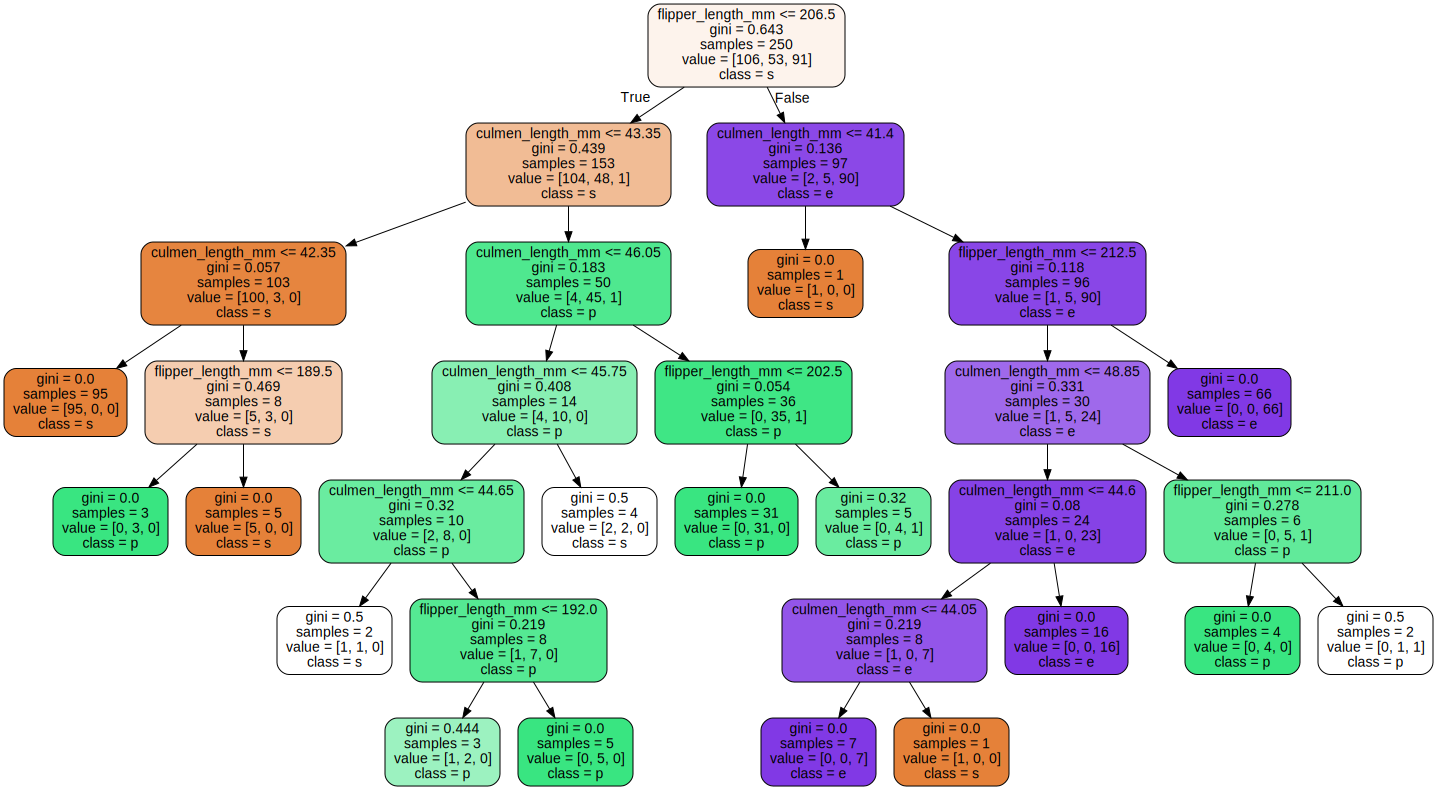

In [35]:
from sklearn.tree import export_graphviz
from graphviz import Source

import os
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "tree images") #!
os.makedirs(IMAGES_PATH, exist_ok=True)

dot_data=export_graphviz(
    tree5, # !, Our model learnt
    out_file = os.path.join(IMAGES_PATH, "penguins_tree_01.dot"), #!
    feature_names = ('culmen_length_mm','flipper_length_mm'), #!
    class_names = ('species'), #!
    rounded = True,
    filled = True,
)
Source.from_file(os.path.join(IMAGES_PATH, "penguins_tree_01.dot"))


## **3. ENSEMBLES FOR PENGUIN DATASET**

Since this Dataset is composed of a Multinomial Target, we will use two types of Classifier Ensembles.

###3.1 BAGGING CLASSIFIER

* MODEL 1: Decission Tree Classifier,   Max Depth = 5, Min Samples Split = 4, Min Samples Leaf = 2, N_Estimators = 500, Max Samples = 100. 
* MODEL 2:  Decission Tree Classifier,   Max Depth = 10, Min Samples Split = 6, Min Samples Leaf = 3, N_Estimators = 500, Max Samples = 100

In [36]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(max_depth = 5, min_samples_split = 4, min_samples_leaf = 2), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)
bagging_clf2 = BaggingClassifier(
    DecisionTreeClassifier(max_depth = 10, min_samples_split=6, min_samples_leaf=3), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)

bagging_clf.fit(X_train, y_train)
bagging_clf2.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        min_samples_leaf=3,
                                                        min_samples_split=6),
                  max_samples=100, n_estimators=500, n_jobs=-1)

Time to make some **predictions** on **test observations** using our ensemble. Let's compare the predictions of the first ten test instances with the actual labels.

In [37]:
# Prediction of the first 10 instances of the Dataset
y_pred10 = bagging_clf.predict(X_test[:10])
print('10 Primmeras instancias del primer modelo')
print(y_pred10)

print('10 Primmeras instancias del segundo modelo')
y_pred10_2 = bagging_clf2.predict(X_test[:10])
print(y_pred10_2)

10 Primmeras instancias del primer modelo
['Adelie' 'Gentoo' 'Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Gentoo'
 'Chinstrap' 'Chinstrap' 'Chinstrap']
10 Primmeras instancias del segundo modelo
['Adelie' 'Gentoo' 'Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Gentoo'
 'Chinstrap' 'Chinstrap' 'Chinstrap']


In [38]:
# Actual labels of these first 10 instances of Test
y_test[:10]


30        Adelie
317       Gentoo
79        Adelie
201    Chinstrap
63        Adelie
304       Gentoo
289       Gentoo
186    Chinstrap
217    Chinstrap
203    Chinstrap
Name: species, dtype: object

The Labels match in order with the predictions for the first 10 rows of the Dataset.




Finally, we calculated some **evaluation metrics** on the full test data.

The confusion matrices are shown below:

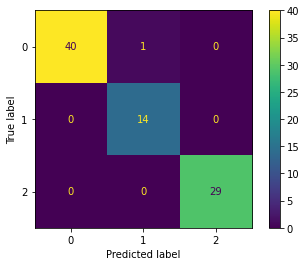

In [39]:
from sklearn.metrics import confusion_matrix

y_pred = bagging_clf.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Interpretation of the Confusion matrix:

* For species 0 (Adelie), we would have of a total of 42 instances, of which 40 are positives, 1 false positive belonging to species 1 (Chinstrap) and 1 false positive belonging to species 0 (Gentoo).
* For species 1 (Chinstrap), we would have a total of 14 instances, of which 14 are positives and no false positives.
* For species 2 (Gentoo), we would have a total of 28 instances, of which 28 are positive and no false positive.




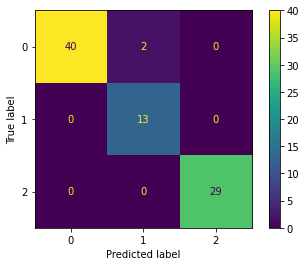

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_2 = bagging_clf2.predict(X_test)
cm2 = confusion_matrix(y_pred_2, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()
plt.show()

Interpretation of the Confusion matrix:

* For species 0 (Adelie), we would have of a total of 42 instances, of which 40 are positives and 2 false positives belonging to species 1 (Chinstrap).
* For species 1 (Chinstrap), we would have a total of 13 instances, of which 13 are positive and no false positives.
* For species 2 (Gentoo), we would have a total of 28 instances, of which 28 are positive and no false positives.




In [41]:

from sklearn.metrics import accuracy_score, classification_report

accu1 = accuracy_score(y_pred, y_test)
print(accu1)

accu2 = accuracy_score(y_pred_2, y_test)
print(accu2)

0.9880952380952381
0.9761904761904762


Success rate of 97.6% for the first configuration and 96.4% for the second configuration. 

In [42]:
print(classification_report(y_pred, y_test))
print(classification_report(y_pred_2, y_test))



              precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99        41
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      1.00      1.00        29

    accuracy                           0.99        84
   macro avg       0.98      0.99      0.98        84
weighted avg       0.99      0.99      0.99        84

              precision    recall  f1-score   support

      Adelie       1.00      0.95      0.98        42
   Chinstrap       0.87      1.00      0.93        13
      Gentoo       1.00      1.00      1.00        29

    accuracy                           0.98        84
   macro avg       0.96      0.98      0.97        84
weighted avg       0.98      0.98      0.98        84



In Accuracy as well as in Recall and F1-score we have obtained a good score for each of the 3 penguin classes. It was not necessary for me to try to define X with the variables beak length, beak depth and wing length. I had proven that for other type of Algorithms like RandomForestClassifier, the results were more optimal using only those two variables. As shown below:

In [43]:
from sklearn.model_selection import train_test_split

X_orig = penguins.select_dtypes(exclude=['object'])
y_orig = penguins.species

# Create training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_orig, y_orig, test_size=.3, random_state=4)

# Initialize a kNN classification model, with hyperparameter 'k=3'.
knn = KNeighborsClassifier(n_neighbors=3)

# Train model: it may seem confusing to do this, since we are talking about an instance-based algorithm.
# However, we need to do this because the 'model' will be the training data itself.
knn.fit(X_train2, y_train2)

KNeighborsClassifier(n_neighbors=3)

In [44]:

from sklearn.ensemble import RandomForestClassifier

peso = RandomForestClassifier(n_estimators=50, n_jobs=-1)
peso.fit(X_train2, y_train2)
for name, score in zip(X_orig, peso.feature_importances_):
    print(name, score)

# This gives us the weight of each attribute. The higher the weight, the greater the importance in the model calculation.

culmen_length_mm 0.41312276662616787
culmen_depth_mm 0.15074669622046769
flipper_length_mm 0.30457858739261906
body_mass_g 0.13155194976074536


The variables with the greatest weight are those previously mentioned, being approximately:


1.  Culmen_Length_mm (length of the Peak): 37.4% 2. 
2.  Flipper_length_mm (wing length): 38.8% 3.
3.  Culmen_depth_mm (peak depth): 12.1% 4.

Body mass has only 1.15% weight in the classification process.



###3.1 RANDOM FOREST CLASSIFIER

We train our model and calculate the weight (importance) of the Dataset attributes.

* MODEL 1: N_Estimators = 50, max_depth = 6, criterion = Gini, min_samples_split = 6.

* MODEL 2: N_Estimators = 100, max_depth = 5, criterion = entropy, min_samples_split = 8.

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=50, max_depth=6, criterion='gini',
                                min_samples_split=6, n_jobs =-1)
rf_clf2 = RandomForestClassifier(n_estimators=100, max_depth=8, criterion='entropy',
                                min_samples_split=8, n_jobs =-1)

print('Peso de los atributos para el primer modelo de Random Classifier')
rf_clf.fit(X_train, y_train)
for name, score in zip(X, rf_clf.feature_importances_):
    print(name, score)

print('Peso de los atributos para el segundo modelo de Random Classifier')
rf_clf2.fit(X_train, y_train)
for name, score in zip(X, rf_clf.feature_importances_):
    print(name, score)

# This gives us the weight of each attribute. The higher the weight, the greater the importance in the model calculation.

Peso de los atributos para el primer modelo de Random Classifier
culmen_length_mm 0.5260166067099529
flipper_length_mm 0.47398339329004713
Peso de los atributos para el segundo modelo de Random Classifier
culmen_length_mm 0.5260166067099529
flipper_length_mm 0.47398339329004713


The weight of the two variables used in the trained model is fairly evenly distributed, with each variable accounting for approximately 50% of the total weight. In other words, both have equal importance in the predictive model.

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred_3 = rf_clf.predict(X_train)
acc3 = accuracy_score(y_train, y_pred_3)
print(acc3)

y_pred_4 = rf_clf2.predict(X_train)
acc4 = accuracy_score(y_train, y_pred_4)
print(acc4)


0.972
0.976


The accuracy obtained in the confusion matrix is practically the same, being slightly better in Model 1.

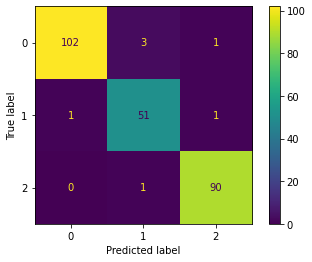

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_train, y_pred_3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Interpretation of the Confusion matrix:

* For species 0 (Adelie), we would have of a total of 106 instances, of which 102 are positives, 3 false positives belonging to species 1 (Chinstrap) and 1 false positive belonging to species 2 (Gentoo).
* For species 1 (Chinstrap), we would have a total of 53 instances, of which 53 are positive and no false positive.
* For species 2 (Gentoo), we would have a total of 91 instances, of which 90 are positive and 1 false positive belonging to species 1 (Chinstrap).


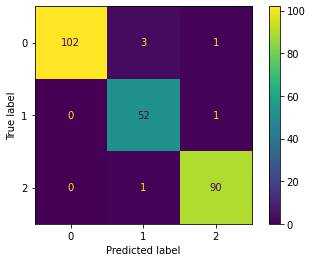

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_train, y_pred_4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Interpretation of the Confusion matrix:

* For species 0 (Adelie), we would have of a total of 106 instances, of which 102 are positives, 3 false positives belonging to species 1 (Chinstrap) and 1 false positive belonging to species 2 (Gentoo).
* For species 1 (Chinstrap), we would have a total of 53 instances, of which 53 are positive and 1 false positive belonging to species 2 (Gentoo).
* For species 2 (Gentoo), we would have a total of 91 instances, of which 90 are positive and 1 false positive belonging to species 1 (Chinstrap).





In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred_3))

print(classification_report(y_train, y_pred_4))

              precision    recall  f1-score   support

      Adelie       0.99      0.96      0.98       106
   Chinstrap       0.93      0.96      0.94        53
      Gentoo       0.98      0.99      0.98        91

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250

              precision    recall  f1-score   support

      Adelie       1.00      0.96      0.98       106
   Chinstrap       0.93      0.98      0.95        53
      Gentoo       0.98      0.99      0.98        91

    accuracy                           0.98       250
   macro avg       0.97      0.98      0.97       250
weighted avg       0.98      0.98      0.98       250



**Conclusion**: both models have given almost identical results in terms of goodness of fit, perhaps with the results obtained in the first model standing out slightly as better.

The following is a summary of the accuracy results obtained for the Penguin Dataframe models.

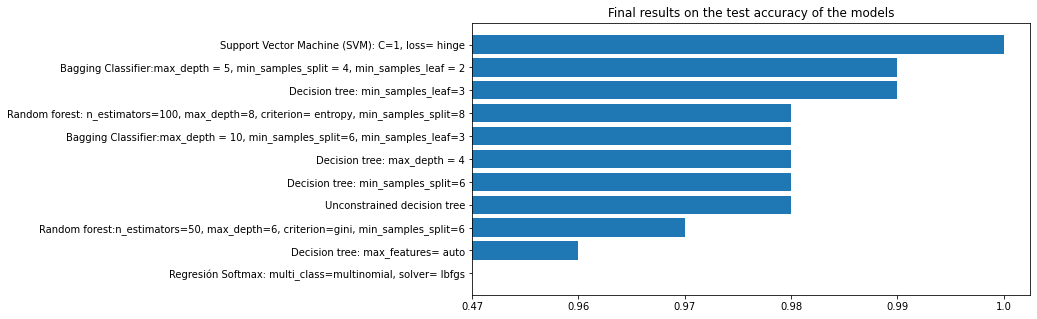

In [50]:
resultados = pd.DataFrame({
    'Modelo_utilizado_y_parámetros': [
              'Regresión Softmax: multi_class=multinomial, solver= lbfgs',
              'Support Vector Machine (SVM): C=1, loss= hinge',
              'Unconstrained decision tree',
              'Decision tree: min_samples_split=6',
              'Decision tree: max_depth = 4',
              'Decision tree: min_samples_leaf=3',
              'Decision tree: max_features= auto',
              'Bagging Classifier:max_depth = 5, min_samples_split = 4, min_samples_leaf = 2',
              'Bagging Classifier:max_depth = 10, min_samples_split=6, min_samples_leaf=3',
              'Random forest:n_estimators=50, max_depth=6, criterion=gini, min_samples_split=6',
              'Random forest: n_estimators=100, max_depth=8, criterion= entropy, min_samples_split=8',
              ],
    "Precision_en_test":[round(score,2),
                      round(svm_acc,2),
                      round(tree4_acc,2),
                      round(tree5_acc,2),
                      round(tree6_acc,2),
                      round(tree7_acc,2),
                      round(tree8_acc,2),
                      round(accu1,2),
                      round(accu2,2),
                      round(acc3,2),
                      round(acc4,2),
                     ]})

resultados_str = resultados.astype(str)
resultados_finales = resultados_str.sort_values(by='Precision_en_test', ascending=True)
resultados_finales = resultados_finales.reset_index(drop=True)
resultados_finales.head(11)

plt.subplots(figsize=(10,5))
ax=plt.barh('Modelo_utilizado_y_parámetros',"Precision_en_test",data=resultados_finales)
resultados_finales = resultados_finales.sort_values(by=['Precision_en_test'])
labels = (resultados_finales["Precision_en_test"])
plt.title('Final results on the test accuracy of the models');

Clearly SVM gives us the best accuracy (**100%**) of all the models tested on the instances reserved for the test.

##**4. ASSEMBLIES FOR THE DATASET OF 50 STARTUPS**

In [51]:
! pip install kaggle
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download farhanmd29/50-startups
! unzip 50-startups.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/1.30k [00:00<?, ?B/s]
100% 1.30k/1.30k [00:00<00:00, 668kB/s]
Archive:  50-startups.zip
  inflating: 50_Startups.csv         


Data collection and preparation, **disregarding the categorical attribute** present in the dataset (*State*) and partitioning into **training and test**.

In [52]:
import pandas as pd

df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [53]:
df_num = df.drop('State', axis=1) # Eliminate categorical variable
df_num.head()

X2 = df_num.drop('Profit',axis=1).astype(int)
y2 = df_num['Profit'].astype(int)

# Partitioned in training + test
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)



##1. ADA BOOST REGRESSOR

We trained an ensemble using the **AdaBoost** algorithm for **regression**, available from *scikit-learn*, using decision tree models as base predictors.

For this Dataset I used two regression-based classification models, since the Target to be classified is of numerical type (specifically of Float or decimal type). I also eliminated (prior to the Split) the categorical variable State to obtain an entirely numerical dataset, and since I considered that it was not relevant.


In [54]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
# Import both theAdaboost algorithm itself (AdaBoosClassifier or AdaBoostRegressor, depending on the problem)
# as well as the type of base model for the predictors.

ada_reg1 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=100, loss = 'square',
    learning_rate=0.5)

ada_reg2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=8), n_estimators=50, loss = 'linear',
    learning_rate=0.5)
# At a minimum, specify maximum ensemble size and learning rate,
# as well as the specific hyperparameters of the base models.

ada_reg1.fit(X_train2, y_train2)
ada_reg2.fit(X_train2, y_train2)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=8),
                  learning_rate=0.5)

Simple error evaluation (**RMSE**) on the test set.

In [55]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred_train = ada_reg1.predict(X_train2)
mse1 = mean_squared_error(y_pred_train, y_train2)
rmse1 = np.sqrt(mse1)
print(rmse1)

y_pred_train2 = ada_reg2.predict(X_train2)
mse2 = mean_squared_error(y_pred_train2, y_train2)
rmse2 = np.sqrt(mse2)
print(rmse2)

1961.0416596559342
316.95370324386494


	
* MODELO 1: Decission Tree Regressor, max_depth = 4, n_estimators = 100, los = square, learning_rate = 0,5. **Error RMSE = 1856**

* MODELO 2: Decission Tree Regressor, max_depth = 8, n_estimators = 50, los = linear, learning_rate = 0,5. **Error RMSE = 317**

The results of the mean square error obtained are much better in the second configuration, despite the fact that in the first one we already obtained a good result.

##2. GRADIEN BOOSTING REGRESSOR

Unlike AdaBoost which adjusts the weights of the predictive models at each iteration, GradientBoosting adjusts each new predictor in the sequence to the residual errors made only by the predictor before it. 

Below are the two models with their hyperparameters:

* MODEL 1: Gradien Boosting Regressor, max_depth = 5, n_estimators = 100, learning_rate = 0,1
Error RMSE = 12111
* MODEL 2: Gradien Boosting Regressor, max_depth = 10, n_estimators = 50, learning_rate = 0,5
* Error RMSE = 10510


In [56]:
from sklearn.ensemble import GradientBoostingRegressor

grad_reg1 = GradientBoostingRegressor(max_depth=5, n_estimators=100, learning_rate=0.1)
grad_reg2 = GradientBoostingRegressor(max_depth=10, n_estimators=50, learning_rate=0.5)
# The lower the learning rate, the greater the number of decision tree models needed, and the lower the risk of overfitting.
grad_reg1.fit(X_train2, y_train2)
grad_reg2.fit(X_train2, y_train2)

GradientBoostingRegressor(learning_rate=0.5, max_depth=10, n_estimators=50)

Simple error evaluation (**RMSE**) on the test set.

In [57]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred3 = grad_reg1.predict(X_test2)
mse3 = mean_squared_error(y_pred3, y_test2)
rmse3 = np.sqrt(mse3)
print(rmse3)

y_pred4 = grad_reg2.predict(X_test2)
mse4 = mean_squared_error(y_pred4, y_test2)
rmse4 = np.sqrt(mse4)
print(rmse4)

12938.791613414769
11325.403766163441


The second Model presents better results in the RMSE error. Finally we observe that specifically for this Dataset, model 1 presented with the Ada Boost Regressor Classifier is a better fit. 

The following is a summary of the RMS results obtained for the 50 Startups Dataframe models.

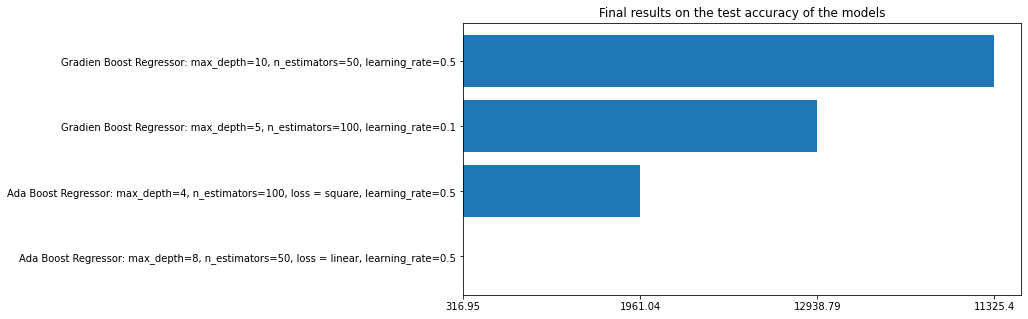

In [58]:
resultados = pd.DataFrame({
    'Modelo_utilizado_y_parámetros': [
              'Ada Boost Regressor: max_depth=4, n_estimators=100, loss = square, learning_rate=0.5',
              'Ada Boost Regressor: max_depth=8, n_estimators=50, loss = linear, learning_rate=0.5',
              'Gradien Boost Regressor: max_depth=5, n_estimators=100, learning_rate=0.1',
              'Gradien Boost Regressor: max_depth=10, n_estimators=50, learning_rate=0.5',
              ],
    "Precision_en_test":[round(rmse1,2),
                      round(rmse2,2),
                      round(rmse3,2),
                      round(rmse4,2),
                     ]})

resultados_str = resultados.astype(str)
resultados_finales = resultados_str.sort_values(by='Precision_en_test', ascending=False)
resultados_finales = resultados_finales.reset_index(drop=True)
resultados_finales.head(4)

plt.subplots(figsize=(10,5))
ax=plt.barh('Modelo_utilizado_y_parámetros',"Precision_en_test",data=resultados_finales)
resultados_finales = resultados_finales.sort_values(by=['Precision_en_test'])
labels = (resultados_finales["Precision_en_test"])
plt.title('Final results on the test accuracy of the models');

We observed that the Ada Boost Regressor configuration with: max_depth=8, n_estimators=50, loss = linear, learning_rate=0.5, obtained the best result in the RMSE calculation (**101.79**).